### **Analysis of qmio measurements for low period measurements ?**

Measurements from 03/04. Specifications:

- ```results6.txt```

States initialized to |1> 

The absolute exectution time was:  0.9987869262695312 \
The theoretical exectution time is (num_rep * rep_period):  1000 * 2e-05 = 0.02

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from qmioanalyzer import read_data, ErrorAnalyzer
from collections import Counter, defaultdict

In [20]:
bits_array = read_data("data/results6.txt")
print(bits_array[:15])

['111110' '000101' '110101' '001111' '110011' '011111' '101001' '010111'
 '101101' '110011' '000110' '111001' '010111' '101000' '010111']


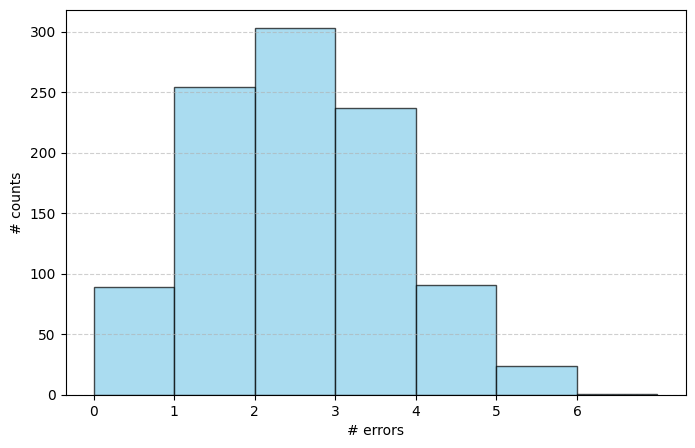

In [21]:
total_errors = errors_dict['low_period_errors']['total_errors']  # number of errors assigned to each measurement

plt.figure(figsize=(8,5))
plt.hist(total_errors, bins=range(min(total_errors), max(total_errors) + 2), color='skyblue', alpha=0.7, edgecolor='black')
plt.xlabel("# errors")
plt.ylabel("# counts")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(range(min(total_errors), max(total_errors) + 1))  # Asegurar que los ticks sean enteros
plt.show()

In [22]:
# parameters of the data
repetition_period = 0.00002
init_state = 1

errors_dict = ErrorAnalyzer(repetition_period = repetition_period, init_state = init_state, measurements = bits_array, verbose=2).get_errors()

The analysis was performed using the *low repetition period* approach 
(repetition_period < 500 μs). The error dictionary contains:

- Key: 'low_period_errors' → A dictionary with 999 measurements with the following subkeys:
  - 'true_errors': Array with the number of true errors (0 expected, 1 measured) for each measurement.
  - 'false_errors': Array with the number of false errors (1 expected, 0 measured) for each measurement.
  - 'total_errors': Array with the total number of errors for each measurement.
  - 'times': Array with the times of each measurement (calculated as i * repetition_period).




In [23]:
states = errors_dict["low_period_errors"]["states"]
expected = errors_dict["low_period_errors"]["expected"]

print(states[:10])
print(expected[:10])

[np.str_('111110'), np.str_('000101'), np.str_('110101'), np.str_('001111'), np.str_('110011'), np.str_('011111'), np.str_('101001'), np.str_('010111'), np.str_('101101'), np.str_('110011')]
['000001', '111010', '001010', '110000', '001100', '100000', '010110', '101000', '010010', '001100']


In [24]:
true_errors = errors_dict['low_period_errors']['true_errors']
false_errors = errors_dict['low_period_errors']['false_errors']

print(true_errors[:10])
print(false_errors[:10])

print(sum(true_errors))
print(sum(false_errors))

[1, 2, 2, 2, 3, 2, 1, 2, 2, 1]
[0, 2, 0, 0, 0, 0, 0, 0, 0, 1]
1669
392


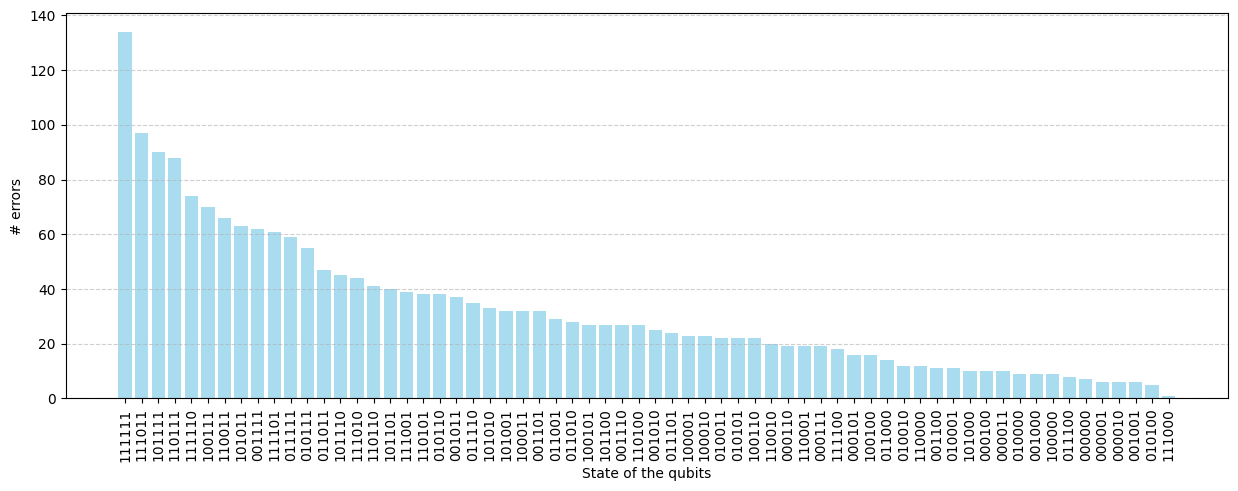

In [25]:
states = errors_dict['low_period_errors']['states']  # measured states
total_errors = errors_dict['low_period_errors']['total_errors']  # number of errors assigned to each measurement

# defining a dictionary to count the number of errors assigned to each state
state_error_counts = defaultdict(int) 

# assigning each state with the corresponding number of errors
for state, error in zip(states, total_errors):
    state_error_counts[state] += error

# we order the states according to their total number of errors
states_sorted = sorted(state_error_counts.keys(), key=lambda x: state_error_counts[x], reverse=True)
errors_sorted = [state_error_counts[state] for state in states_sorted]

# graph with the result
plt.figure(figsize=(15,5))
plt.bar(states_sorted, errors_sorted, color='skyblue', alpha=0.7)
plt.xlabel("State of the qubits")
plt.ylabel("# errors")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


True errors: If a 0 measurement is expected and instead we measure a 1.
False errors:  If a 1 measurement is expected and instead we measure a 0.
Number of true errors: 1669
Number of false errors 392


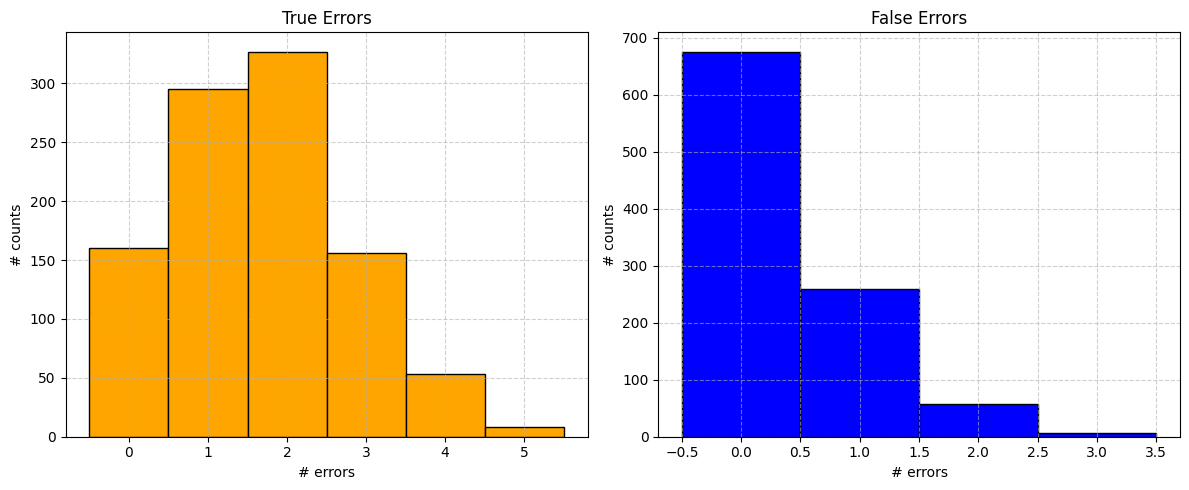

In [26]:
print("True errors: If a 0 measurement is expected and instead we measure a 1.")
print("False errors:  If a 1 measurement is expected and instead we measure a 0.")

print('Number of true errors:',sum(true_errors))
print('Number of false errors', sum(false_errors))


plt.figure(figsize=(12, 5))

    # Histograma de True Errors
plt.subplot(1, 2, 1)
plt.hist(true_errors, bins=range(max(true_errors)+2), edgecolor='black', align='left', color='orange')
plt.title("True Errors")
plt.xlabel("# errors")
plt.ylabel("# counts")
plt.grid(True, linestyle="--", alpha=0.6)

    # Histograma de False Errors
plt.subplot(1, 2, 2)
plt.hist(false_errors, bins=range(max(false_errors)+2), edgecolor='black', align='left', color='blue')
plt.title("False Errors")
plt.xlabel("# errors")
plt.ylabel("# counts")
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

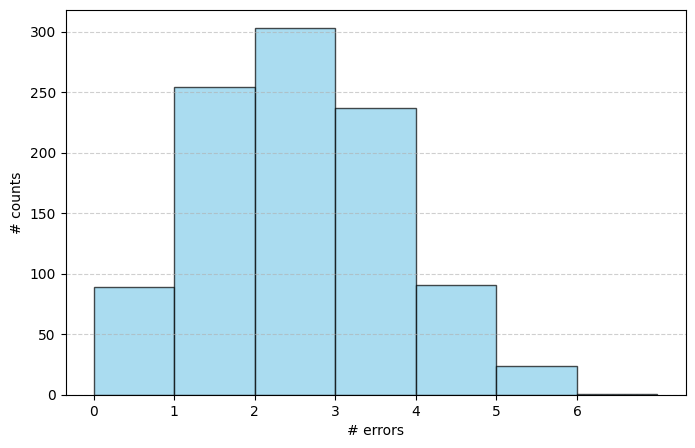

In [27]:
total_errors = errors_dict['low_period_errors']['total_errors']  # number of errors assigned to each measurement

plt.figure(figsize=(8,5))
plt.hist(total_errors, bins=range(min(total_errors), max(total_errors) + 2), color='skyblue', alpha=0.7, edgecolor='black')
plt.xlabel("# errors")
plt.ylabel("# counts")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(range(min(total_errors), max(total_errors) + 1))  # Asegurar que los ticks sean enteros
plt.show()

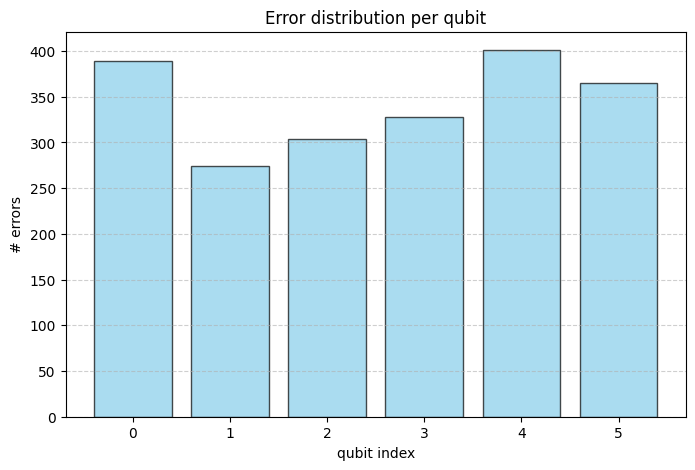

In [28]:
errors_per_qubit = errors_dict["low_period_errors"]["errors_per_qubit"]

# Graficar
plt.figure(figsize=(8, 5))
plt.bar(range(len(errors_per_qubit)), errors_per_qubit, color='skyblue', alpha=0.7, edgecolor='black')

# Etiquetas
plt.xlabel("qubit index")
plt.ylabel("# errors")
plt.title("Error distribution per qubit")
plt.xticks(range(len(errors_per_qubit)))  # Marcamos los qubits en el eje X
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()